# Tarefa Numérica 2

Algoritmo no livro:

1. Dá um chute do valor do passo
2. Estima o erro com três $\kappa_i$
3. Reduz o passo até que o erro esteja dentro da tolerância
4. Avança a solução com uma fórmula precisa
5. Repete até o tempo final


In [ ]:
import numpy as np
import pandas as pd


# Definição do problema de Cauchy com solução exata conhecida
# y' = -2 t y, y(0) = 1 → solução exata: y(t) = exp(-t^2)
def f(t, y):
    return -2 * t * y

def y_exact(t):
    return np.exp(-t**2)

# Implementação de métodos Runge-Kutta

# RK3 clássico (ordem 3)
def rk3_step(t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + (h/2) * k1)
    k3 = f(t + h, y - h * k1 + 2 * h * k2)
    return y + (h/6) * (k1 + 4 * k2 + k3)

# RK4 clássico (ordem 4)
def rk4_step(t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + (h/2) * k1)
    k3 = f(t + h/2, y + (h/2) * k2)
    k4 = f(t + h, y + h * k3)
    return y + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)

# Função para gerar tabela de convergência de um método dado
def convergence_table(method_step, t_final=0.5, n_values=[4, 8, 16, 32, 64]):
    results = []
    for n in n_values:
        h = t_final / n
        y = 1.0  # condição inicial
        t = 0.0
        for _ in range(n):
            y = method_step(t, y, h)
            t += h
        e = abs(y - y_exact(t_final))
        results.append((n, h, e))
    # Construir tabela com estimativa de ordem
    table = []
    for i, (n, h, e) in enumerate(results):
        if i == 0:
            table.append((n, h, e, np.nan, np.nan))
        else:
            _, _, e_prev = results[i-1]
            q = e_prev / e
            p_est = np.log2(q)
            table.append((n, h, e, q, p_est))
    df = pd.DataFrame(table, columns=["n", "h", "|e(t,h)|", "q", "p*"])
    return df

# Gerar e exibir tabelas para RK3 e RK4
df_rk3 = convergence_table(rk3_step)
df_rk4 = convergence_table(rk4_step)

In [2]:
display(df_rk3)

,n,h,"|e(t,h)|",q,p*
0,4,0.125000,1.371068e-04,NaN,NaN
1,8,0.062500,1.605161e-05,8.541623,3.094510
2,16,0.031250,1.942681e-06,8.262607,3.046597
3,32,0.015625,2.389747e-07,8.129234,3.023119
4,64,0.007812,2.963438e-08,8.064104,3.011514


In [3]:
display(df_rk4)

,n,h,"|e(t,h)|",q,p*
0,4,0.125000,4.523219e-08,NaN,NaN
1,8,0.062500,3.075462e-09,14.707442,3.878474
2,16,0.031250,3.599920e-10,8.543140,3.094766
3,32,0.015625,2.746348e-11,13.108029,3.712379
4,64,0.007812,1.867284e-12,14.707712,3.878501


In [5]:
import numpy as np
import pandas as pd

# Definição do problema de Cauchy (suave) usado apenas para f; não usamos solução exata
def f(t, y):
    return -2 * t * y

# Implementação de RK3 e RK4 (ordens 3 e 4)
def rk3_step(t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + (h/2) * k1)
    k3 = f(t + h, y - h * k1 + 2 * h * k2)
    return y + (h/6) * (k1 + 4 * k2 + k3)

def rk4_step(t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + (h/2) * k1)
    k3 = f(t + h/2, y + (h/2) * k2)
    k4 = f(t + h, y + h * k3)
    return y + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)

# Gera tabela de convergência sem usar erro exato
def convergence_table_no_exact(method_step, t_final=0.5, n_values=[4, 8, 16, 32, 64]):
    results = []
    for n in n_values:
        h = t_final / n
        # aproximação com passo h
        y_h = 1.0
        t = 0.0
        for _ in range(n):
            y_h = method_step(t, y_h, h)
            t += h
        # aproximação com passo h/2
        y_h2 = 1.0
        t = 0.0
        for _ in range(2 * n):
            y_h2 = method_step(t, y_h2, h/2)
            t += h/2
        # estimativa de erro local
        err_est = abs(y_h - y_h2)
        results.append((n, h, y_h, y_h2, err_est))
    # montar tabela com estimativa de ordem
    table = []
    for i, (n, h, y_h, y_h2, err_est) in enumerate(results):
        if i == 0:
            table.append((n, h, y_h, y_h2, err_est, np.nan, np.nan))
        else:
            _, _, _, _, err_prev = results[i-1]
            q = err_prev / err_est
            p_est = np.log2(q)
            table.append((n, h, y_h, y_h2, err_est, q, p_est))
    df = pd.DataFrame(table, columns=["n", "h", "η(h)", "η(h/2)", "err_est", "q", "p*"])
    return df

# Exibir tabelas para RK3 e RK4
df_rk3 = convergence_table_no_exact(rk3_step)
df_rk4 = convergence_table_no_exact(rk4_step)


In [6]:
display(df_rk3)

,n,h,η(h),η(h/2),err_est,q,p*
0,4,0.125000,0.778938,0.778817,1.210552e-04,NaN,NaN
1,8,0.062500,0.778817,0.778803,1.410893e-05,8.580041,3.100985
2,16,0.031250,0.778803,0.778801,1.703707e-06,8.281315,3.049860
3,32,0.015625,0.778801,0.778801,2.093403e-07,8.138453,3.024755
4,64,0.007812,0.778801,0.778801,2.594481e-08,8.068680,3.012333


In [7]:
display(df_rk4)

,n,h,η(h),η(h/2),err_est,q,p*
0,4,0.125000,0.778801,0.778801,4.830765e-08,NaN,NaN
1,8,0.062500,0.778801,0.778801,2.715470e-09,17.789790,4.152978
2,16,0.031250,0.778801,0.778801,3.325286e-10,8.166127,3.029652
3,32,0.015625,0.778801,0.778801,2.559619e-11,12.991329,3.699477
4,64,0.007812,0.778801,0.778801,1.745715e-12,14.662300,3.874039


# Atualização 03/07/2025

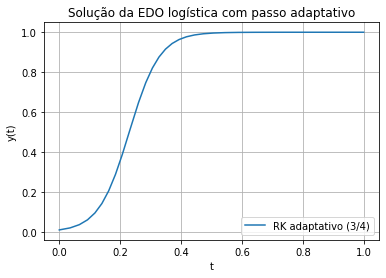

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a EDO com regiões de rápida variação: EDO logística com crescimento rápido
# y' = r * y * (1 - y/K), y(0) = y0
r = 20  # crescimento rápido
K = 1   # capacidade de suporte
y0 = 0.01

def f(t, y):
    return r * y * (1 - y / K)

# Implementação de RK3 e RK4 (para controle de passo)
def rk3_step(t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + (h/2) * k1)
    k3 = f(t + h, y - h * k1 + 2 * h * k2)
    return y + (h/6) * (k1 + 4 * k2 + k3)

def rk4_step(t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + (h/2) * k1)
    k3 = f(t + h/2, y + (h/2) * k2)
    k4 = f(t + h, y + h * k3)
    return y + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)

# Método de passo adaptativo usando RK3 e RK4
def runge_kutta_adaptativo(t0, y0, t_final, h0, epsilon):
    t = [t0]
    y = [y0]
    h = h0

    while t[-1] < t_final:
        tk = t[-1]
        yk = y[-1]

        # Cálculo das duas estimativas
        eta3 = rk3_step(tk, yk, h)
        eta4 = rk4_step(tk, yk, h)

        # Estimativa do erro
        erro_estimado = abs(eta4 - eta3)

        if erro_estimado < epsilon:
            # Aceita o passo
            t.append(tk + h)
            y.append(eta4)

        # Ajuste de h
        if erro_estimado == 0:
            s = 2
        else:
            s = (epsilon / erro_estimado) ** 0.25
        h = min(h * s, t_final - t[-1])

    return np.array(t), np.array(y)

# Parâmetros do controle
t0 = 0
t_final = 1
h0 = 0.05
epsilon = 1e-4

# Executar método adaptativo
t_adapt, y_adapt = runge_kutta_adaptativo(t0, y0, t_final, h0, epsilon)

# Mostrar resultado
plt.plot(t_adapt, y_adapt, label='RK adaptativo (3/4)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solução da EDO logística com passo adaptativo')
plt.grid(True)
plt.legend()
plt.show()